In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from eden.util import configure_logging
import logging
logger = logging.getLogger()
configure_logging(logger,verbosity=2)
from IPython.core.display import HTML
HTML('<style>.container { width:95% !important; }</style>')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
def annotate(G):
    for n in G.nodes():
        G.node[n]['label']=n
    for u,v in G.edges():
        G.edge[u][v]['label']='-'

In [22]:
import networkx as nx
G=nx.barabasi_albert_graph(200, 4, seed=2)
annotate(G)
print '#n: %d  e:%d' % (len(G.nodes()), len(G.edges()))

#n: 200  e:784


In [47]:
import networkx as nx
G=nx.dorogovtsev_goltsev_mendes_graph(4)
annotate(G)
print '#n: %d  e:%d' % (len(G.nodes()), len(G.edges()))

#n: 42  e:81


In [92]:
import networkx as nx
sequence=[1, 2, 2, 3,4]
G=nx.connected_watts_strogatz_graph(n=50, k=4, p=0.5)
annotate(G)
print '#n: %d  e:%d' % (len(G.nodes()), len(G.edges()))

#n: 50  e:100


In [93]:
#help(draw_graph)

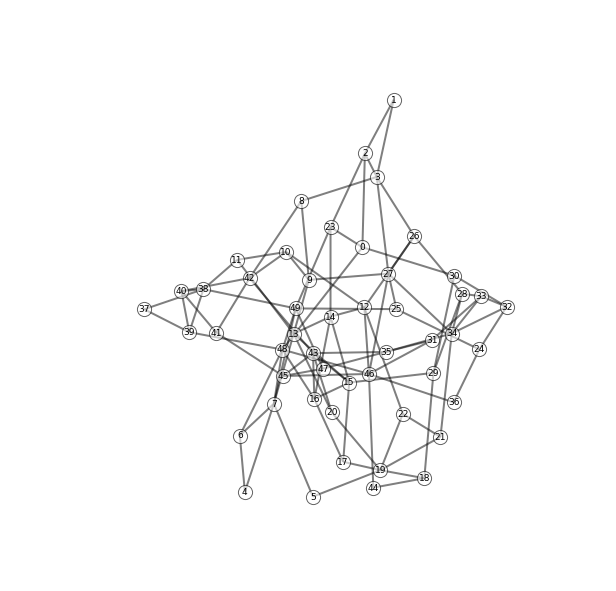

In [94]:
from eden.util.display import draw_graph, serialize_graph
#print serialize_graph(G)
draw_graph(G, vertex_border=1, edge_label=None, vertex_size=200, prog='sfdp')

In [95]:
k_list=[5,6]

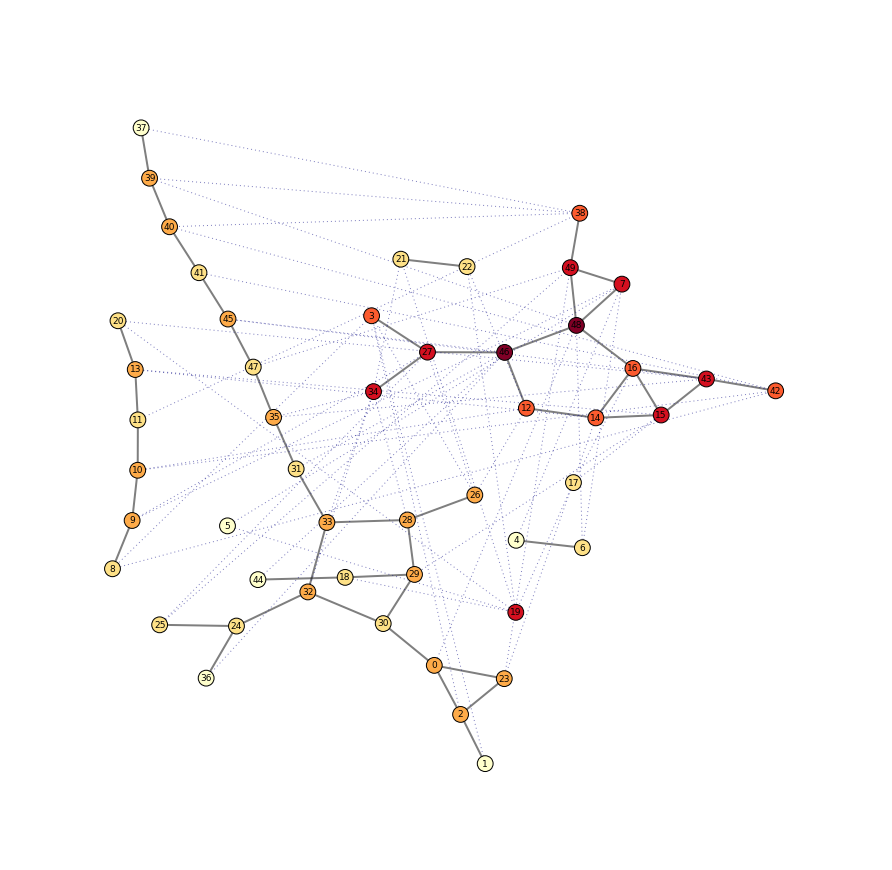

In [96]:
graphs=[G]

from GArDen.interfaces import transform
from GArDen.transform.coarsen import KCoreDecomposer
graphs=transform(graphs, program=KCoreDecomposer(k_list=k_list))

g=graphs.next()
from eden.util.display import draw_graph
draw_graph(g,size=15, prog='neato',  ignore_for_layout='nesting',
           vertex_border=1, vertex_size=250,  vertex_alpha=1, vertex_color='degree',
           edge_label=None, dark_edge_dotted=True, dark_edge_color='level', dark_edge_alpha=.5)   

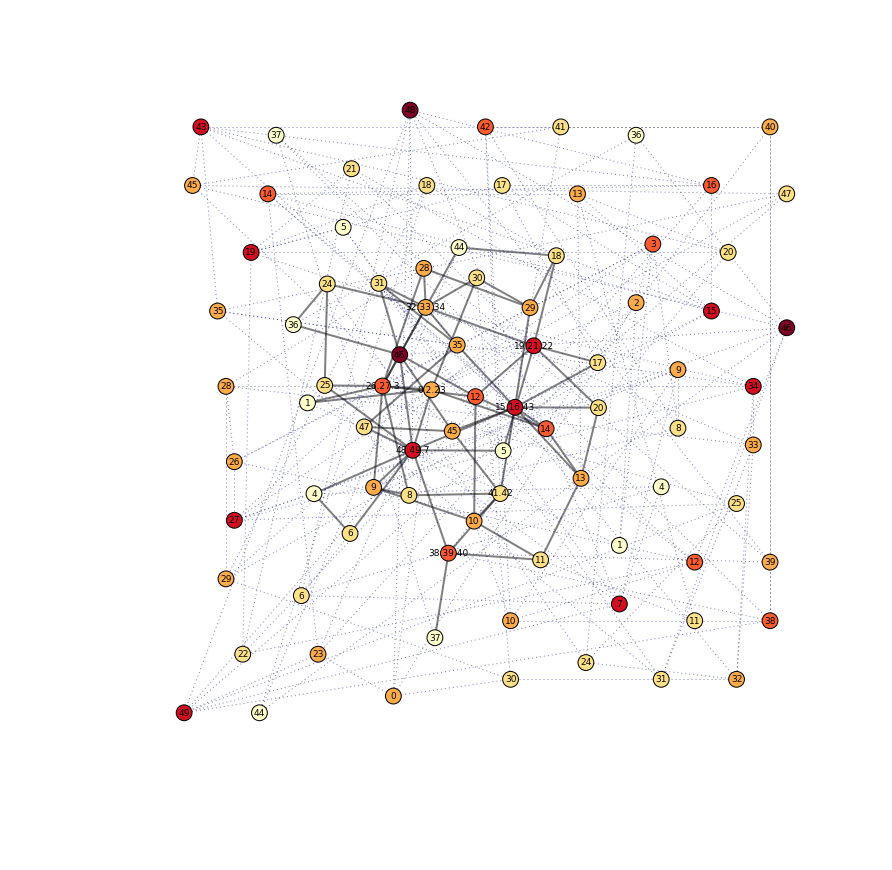

In [97]:
graphs=[G]

from GArDen.interfaces import transform
from GArDen.transform.coarsen import CliqueDecomposer
graphs=transform(graphs, program=CliqueDecomposer(min_clique_size=3,nesting=True,original_edges_to_nesting=True))

g=graphs.next()
from eden.util.display import draw_graph
draw_graph(g,size=15, prog='neato',  ignore_for_layout='nesting',
           vertex_border=1, vertex_size=250,  vertex_alpha=1, vertex_color='degree',
           edge_label=None, dark_edge_dotted=True, dark_edge_color='level', dark_edge_alpha=.5)    

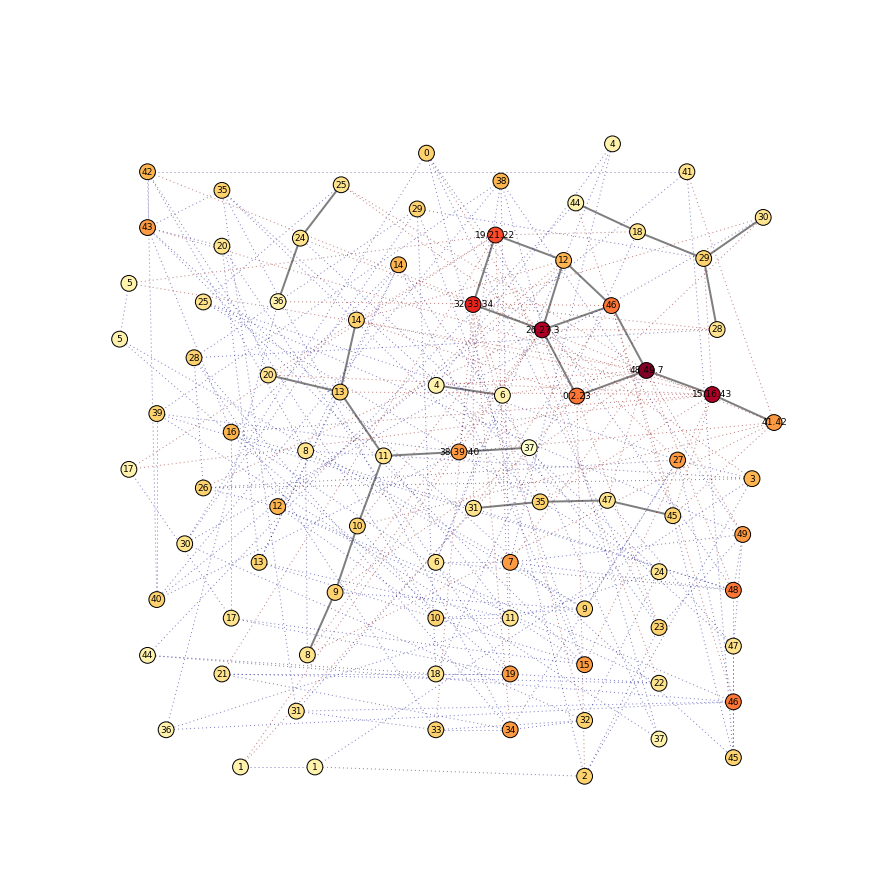

In [98]:
graphs=[g]

from GArDen.interfaces import transform
from GArDen.transform.coarsen import KCoreDecomposer
graphs=transform(graphs, program=KCoreDecomposer(k_list=k_list))

g=graphs.next()
from eden.util.display import draw_graph
draw_graph(g,size=15, prog='neato',  ignore_for_layout='nesting',
           vertex_border=1, vertex_size=250,  vertex_alpha=1, vertex_color='degree',
           edge_label=None, dark_edge_dotted=True, dark_edge_color='level', dark_edge_alpha=.5)   

---